# Defect Rate Optimization Using Binomial Distribution
This case study uses production data from a manufacturing company to analyze and optimize defect rates using binomial distribution.

## 1. Import Libraries and Load Data

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, ttest_ind

# Load raw data


In [5]:
df = pd.read_csv("raw_manufacturing_data.csv")
df.head()

,Batch_ID,Date,Shift,Plant,State,Machine_Model,Machine_ID,Operator_ID,Total_Produced,Defective_Units
0,B001,2025-01-16,B,Plant1,Maharashtra,MX-1000,M01,O109,1000,20
1,B002,2025-02-25,B,Plant3,Tamil Nadu,MX-3000,M05,O112,1000,15
2,B003,2025-01-31,C,Plant2,Tamil Nadu,MX-3000,M03,O119,1000,8
3,B004,2025-01-22,C,Plant1,Gujarat,MX-2000,M05,O107,1000,18
4,B005,2025-01-11,A,Plant2,Tamil Nadu,MX-3000,M06,O105,1000,14


## 2. Data Cleaning

### a. Check for Missing Values

In [8]:
df.isnull().sum()

Batch_ID           0
Date               0
Shift              0
Plant              0
State              0
Machine_Model      0
Machine_ID         0
Operator_ID        0
Total_Produced     0
Defective_Units    0
dtype: int64

### b. Check for Duplicates

In [10]:
df.duplicated().sum()
df = df.drop_duplicates()
df.head()

,Batch_ID,Date,Shift,Plant,State,Machine_Model,Machine_ID,Operator_ID,Total_Produced,Defective_Units
0,B001,2025-01-16,B,Plant1,Maharashtra,MX-1000,M01,O109,1000,20
1,B002,2025-02-25,B,Plant3,Tamil Nadu,MX-3000,M05,O112,1000,15
2,B003,2025-01-31,C,Plant2,Tamil Nadu,MX-3000,M03,O119,1000,8
3,B004,2025-01-22,C,Plant1,Gujarat,MX-2000,M05,O107,1000,18
4,B005,2025-01-11,A,Plant2,Tamil Nadu,MX-3000,M06,O105,1000,14


### c. Check for Outliers in Defective Units

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

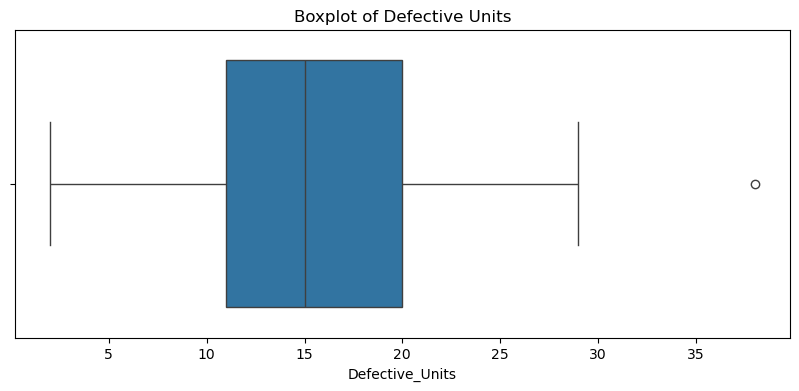

In [13]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df["Defective_Units"])
plt.title("Boxplot of Defective Units")
plt.show()

## 3. Feature Engineering
Add a calculated defect rate per batch.

In [15]:
df['Defect_Rate'] = df['Defective_Units'] / df['Total_Produced']
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Batch_ID,Date,Shift,Plant,State,Machine_Model,Machine_ID,Operator_ID,Total_Produced,Defective_Units,Defect_Rate
0,B001,2025-01-16,B,Plant1,Maharashtra,MX-1000,M01,O109,1000,20,0.020
1,B002,2025-02-25,B,Plant3,Tamil Nadu,MX-3000,M05,O112,1000,15,0.015
2,B003,2025-01-31,C,Plant2,Tamil Nadu,MX-3000,M03,O119,1000,8,0.008
3,B004,2025-01-22,C,Plant1,Gujarat,MX-2000,M05,O107,1000,18,0.018
4,B005,2025-01-11,A,Plant2,Tamil Nadu,MX-3000,M06,O105,1000,14,0.014


## 4. Binomial Distribution Modeling

### Probability of exactly 15 defective units (n=1000, p=0.015)

In [18]:
from scipy.stats import binom
binom.pmf(15, n=1000, p=0.015)

0.10321275718527624

### Probability of getting 20 or fewer defects

In [20]:
binom.cdf(20, n=1000, p=0.015)

0.9186065402319624

### Simulate expected defect count distribution

In [22]:
x = np.arange(0, 50)
p = 0.015
binom_pmf = binom.pmf(x, 1000, p)
binom_pmf

array([2.73042655e-07, 4.15800997e-06, 3.16283144e-05, 1.60228720e-04,
       6.08177793e-04, 1.84490888e-03, 4.65909729e-03, 1.00750023e-02,
       1.90440557e-02, 3.19656569e-02, 4.82405574e-02, 6.61164999e-02,
       8.29812417e-02, 9.60392035e-02, 1.03108079e-01, 1.03212757e-01,
       9.67619599e-02, 8.52915215e-02, 7.09319506e-02, 5.58283533e-02,
       4.17012294e-02, 2.96353915e-02, 2.00828668e-02, 1.30044430e-02,
       8.06176447e-03, 4.79286221e-03, 2.73704060e-03, 1.50359704e-03,
       7.95685233e-04, 4.06129554e-04, 2.00178577e-04, 9.53855672e-05,
       4.39856986e-05, 1.96484339e-05, 8.51001892e-06, 3.57679983e-06,
       1.46007269e-06, 5.79301717e-07, 2.23564341e-07, 8.39784836e-08,
       3.07246153e-08, 1.09554156e-08, 3.80937040e-09, 1.29242481e-09,
       4.28074714e-10, 1.38490500e-10, 4.37845157e-11, 1.35339976e-11,
       4.09197327e-12, 1.21067810e-12])

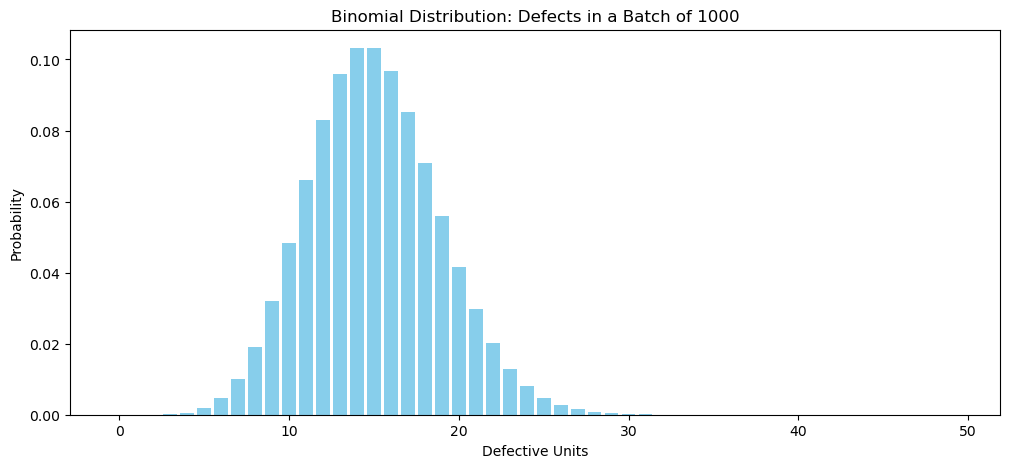

In [23]:
plt.figure(figsize=(12, 5))
plt.bar(x, binom_pmf, color='skyblue')
plt.title("Binomial Distribution: Defects in a Batch of 1000")
plt.xlabel("Defective Units")
plt.ylabel("Probability")
plt.show()

## 5. Hypothesis Testing (Simulate Process Change)

Assume we tag batches before and after a new QC process.

In [26]:
# Simulate: First 100 = pre-QC, Last 100 = post-QC
pre_qc = df.iloc[:100]['Defective_Units']
post_qc = df.iloc[100:]['Defective_Units']

In [27]:
pre_qc.head()

0    20
1    15
2     8
3    18
4    14
Name: Defective_Units, dtype: int64

In [28]:
post_qc.head()

100    21
101    18
102    11
103     9
104    19
Name: Defective_Units, dtype: int64

# Independent t-test

In [30]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(pre_qc, post_qc)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")

T-statistic: -1.746, P-value: 0.082


### Interpretation:
- If p < 0.05, there's statistically significant improvement after the QC process.

## 6. Business Recommendations
- Focus QC on machines or plants with higher defect rates.
- Predict and flag high-risk batches using binomial thresholding.
- Reduce waste, increase yield, and improve customer satisfaction.


In [33]:
df.columns

Index(['Batch_ID', 'Date', 'Shift', 'Plant', 'State', 'Machine_Model',
       'Machine_ID', 'Operator_ID', 'Total_Produced', 'Defective_Units',
       'Defect_Rate'],
      dtype='object')

In [34]:
 #Assume total produced is 1000 for each batch, and defect probability is 0.015
df['P(X = x)'] = binom.pmf(df['Defective_Units'], df['Total_Produced'], 0.015)
df['P(X ≤ x)'] = binom.cdf(df['Defective_Units'], df['Total_Produced'], 0.015)

df[['Batch_ID', 'Defective_Units', 'P(X = x)', 'P(X ≤ x)']].head()

,Batch_ID,Defective_Units,P(X = x),P(X ≤ x)
0,B001,20,0.041701,0.918607
1,B002,15,0.103213,0.568092
2,B003,8,0.019044,0.036428
3,B004,18,0.070932,0.821077
4,B005,14,0.103108,0.464879


In [35]:
df.head()

,Batch_ID,Date,Shift,Plant,State,Machine_Model,Machine_ID,Operator_ID,Total_Produced,Defective_Units,Defect_Rate,P(X = x),P(X ≤ x)
0,B001,2025-01-16,B,Plant1,Maharashtra,MX-1000,M01,O109,1000,20,0.020,0.041701,0.918607
1,B002,2025-02-25,B,Plant3,Tamil Nadu,MX-3000,M05,O112,1000,15,0.015,0.103213,0.568092
2,B003,2025-01-31,C,Plant2,Tamil Nadu,MX-3000,M03,O119,1000,8,0.008,0.019044,0.036428
3,B004,2025-01-22,C,Plant1,Gujarat,MX-2000,M05,O107,1000,18,0.018,0.070932,0.821077
4,B005,2025-01-11,A,Plant2,Tamil Nadu,MX-3000,M06,O105,1000,14,0.014,0.103108,0.464879


In [55]:
df.to_csv('binom_output_manufacturing_defects')